In [2]:
import warnings
import sys
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math #needed for definition of pi

np.set_printoptions(precision=3, suppress=True, linewidth=100)

In [310]:
class tailMultLat(object):
    def __init__(self, latsPath):
        self.reqTimes = np.empty([0,0])
        for idx in [1,2,3,4,5,6,7,8]:
            fileName = latsPath+"/lats-"+str(idx)+".bin"
            if os.path.exists(fileName):
                f = open(fileName, 'rb')
                a = np.fromfile(f, dtype=np.uint64) # a will be 1-D array of all data
                self.reqTimes = np.append(self.reqTimes, a, axis=None)
                f.close()
            else:
                print("not found in this dir :", fileName)
        
        self.reqTimes = self.reqTimes.reshape((self.reqTimes.shape[0]//3, 3))


    def parseQueueTimes(self):
        return self.reqTimes[:, 0]

    def parseSvcTimes(self):
        return self.reqTimes[:, 1]

    def parseSojournTimes(self):
        return self.reqTimes[:, 2]

def getTailMultLatPct(latsFolder):
    # print(latsFolder)
    assert os.path.exists(latsFolder)

    latsObj = tailMultLat(latsFolder)

    qTimes = [l/1e6 for l in latsObj.parseQueueTimes()]
    svcTimes = [l/1e6 for l in latsObj.parseSvcTimes()]
    sjrnTimes = [l/1e6 for l in latsObj.parseSojournTimes()]
    # spinTimes = latsObj.parseSpinTimes()
    f = open('lats.txt','w')

    f.write('%12s | %12s | %12s \n\n' \
            % ('QueueTimes', 'ServiceTimes', 'SojournTimes'))

    for (q, svc, sjrn) in zip(qTimes, svcTimes, sjrnTimes):
        f.write("%12s | %12s | %12s \n" \
                % ('%.3f' % q, '%.3f' % svc, '%.3f' % sjrn))
    f.close()
    p95 = stats.scoreatpercentile(sjrnTimes, 95)
    p99 = stats.scoreatpercentile(sjrnTimes, 99)
    meanLat = stats.tmean(sjrnTimes)

    svc95 = stats.scoreatpercentile(svcTimes, 95)
    svc99 = stats.scoreatpercentile(svcTimes, 99)
    svcMean = stats.tmean(svcTimes)
    maxLat = max(sjrnTimes)

    # return np.asarray([meanLat, p95, p99, svcMean, svc95, svc99])
    return (sjrnTimes,svcTimes)

In [266]:
class uMultLat(object):
    def __init__(self, latsPath):
        self.reqTimes = np.empty([0,0])
        for idx in [1,2,3,4,5,6,7,8]:
        # for idx in [1,]:
            fileName = latsPath+"/lats-"+str(idx)+".bin"
            if os.path.exists(fileName):
                f = open(fileName, 'rb')
                a = np.fromfile(f, dtype=np.uint64) # a will be 1-D array of all data
                self.reqTimes = np.append(self.reqTimes, a, axis=None)
                f.close()
            else:
                print("not found in this dir :", fileName)
        
        self.reqTimes = self.reqTimes.reshape((self.reqTimes.shape[0]//4, 4))


    def parseQueueTimes(self):
        return self.reqTimes[10:, 0]

    def parseSvcTimes(self):
        return self.reqTimes[10:, 1]

    def parseSojournTimes(self):
        return self.reqTimes[10:, 2]

def getuMultLatPct(latsFolder):
    # print(latsFolder)
    assert os.path.exists(latsFolder)

    latsObj = uMultLat(latsFolder)

    qTimes = [l/1e6 for l in latsObj.parseQueueTimes()]
    svcTimes = [l/1e6 for l in latsObj.parseSvcTimes()]
    sjrnTimes = [l/1e6 for l in latsObj.parseSojournTimes()]
    # spinTimes = latsObj.parseSpinTimes()
    f = open('lats.txt','w')

    f.write('%12s | %12s | %12s \n\n' \
            % ('QueueTimes', 'ServiceTimes', 'SojournTimes'))

    for (q, svc, sjrn) in zip(qTimes, svcTimes, sjrnTimes):
        f.write("%12s | %12s | %12s \n" \
                % ('%.3f' % q, '%.3f' % svc, '%.3f' % sjrn))
    f.close()
    p95 = stats.scoreatpercentile(sjrnTimes, 95)
    p99 = stats.scoreatpercentile(sjrnTimes, 99)
    meanLat = stats.tmean(sjrnTimes)

    svc95 = stats.scoreatpercentile(svcTimes, 95)
    svc99 = stats.scoreatpercentile(svcTimes, 99)
    svcMean = stats.tmean(svcTimes)
    maxLat = max(sjrnTimes)

    # return np.asarray([meanLat, p95, p99, svcMean, svc95, svc99])
    return (sjrnTimes,svcTimes)


not found in this dir : /home/zohan/microbench/result-microsphinx-2-criticaltry/0.2/lats-2.bin
not found in this dir : /home/zohan/microbench/result-microsphinx-2-criticaltry/0.2/lats-3.bin
not found in this dir : /home/zohan/microbench/result-microsphinx-2-criticaltry/0.2/lats-4.bin
not found in this dir : /home/zohan/microbench/result-microsphinx-2-criticaltry/0.2/lats-5.bin
not found in this dir : /home/zohan/microbench/result-microsphinx-2-criticaltry/0.2/lats-6.bin
not found in this dir : /home/zohan/microbench/result-microsphinx-2-criticaltry/0.2/lats-7.bin
not found in this dir : /home/zohan/microbench/result-microsphinx-2-criticaltry/0.2/lats-8.bin
2820.07530526875 5663.0017765 6236.758370285715 6255.980146284001
3058.22469375 5713.31586 6312.803688 6287.741740324002


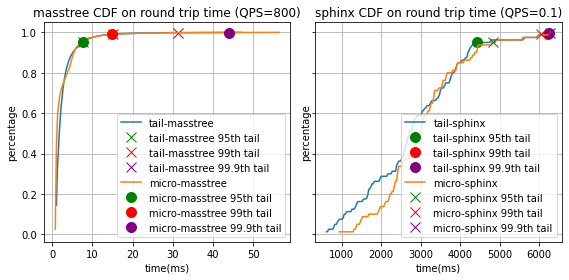

In [8]:
fig, (ax0,ax1) = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(8, 4))

sjrnTailData, svcTailData= getTailMultLatPct("/home/zohan/tailbench/results/masstree-2/800")
sjrnTailDatamean = stats.tmean(sjrnTailData)
sjrnTailData95th = stats.scoreatpercentile(sjrnTailData, 95)
sjrnTailData99th = stats.scoreatpercentile(sjrnTailData, 99)
sjrnTailData999th = stats.scoreatpercentile(sjrnTailData, 99.9)
sjrnTail95Mean = stats.tmean(sjrnTailData, (sjrnTailData95th, max(sjrnTailData)))
sjrnTail99Mean = stats.tmean(sjrnTailData, (sjrnTailData99th, max(sjrnTailData)))

sjrnMicroData, svcMicroData= getuMultLatPct("/home/zohan/microbench/result-micromasstree-2-test/800")
sjrnMicroDatamean = stats.tmean(sjrnMicroData)
sjrnMicroData95th = stats.scoreatpercentile(sjrnMicroData, 95)
sjrnMicroData99th = stats.scoreatpercentile(sjrnMicroData, 99)
sjrnMicroData999th = stats.scoreatpercentile(sjrnMicroData, 99.9)
sjrnMicro95Mean = stats.tmean(sjrnMicroData, (sjrnMicroData95th, max(sjrnMicroData)))
sjrnMicro99Mean = stats.tmean(sjrnMicroData, (sjrnMicroData99th, max(sjrnMicroData)))

tailArrays,tailBase,_ = ax0.hist(sjrnTailData,bins=200,density=True,cumulative=1,histtype='step')
microArrays,microBase,_ = ax0.hist(sjrnMicroData,bins=200,density=True,cumulative=1,histtype='step')

ax0.cla()
ax0.plot(tailBase[0:200], tailArrays,label='tail-masstree')
ax0.plot(sjrnTailData95th,0.95,'x',color="green",label="tail-masstree 95th tail",markersize=10)
ax0.plot(sjrnTailData99th,0.99,'x',color="red",label="tail-masstree 99th tail",markersize=10)
ax0.plot(sjrnTailData999th,0.999,'x',color="purple",label="tail-masstree 99.9th tail",markersize=10)

ax0.plot(microBase[0:200], microArrays,label='micro-masstree')
ax0.plot(sjrnMicroData95th,0.95,'o',color="green",label="micro-masstree 95th tail",markersize=10)
ax0.plot(sjrnMicroData99th,0.99,'o',color="red",label="micro-masstree 99th tail",markersize=10)
ax0.plot(sjrnMicroData999th,0.999,'o',color="purple",label="micro-masstree 99.9th tail",markersize=10)
# arrays,base,_ = ax0.hist(sjrnData,bins=200,density=True,cumulative=1,histtype='step')
# ax0.cla()
# ax0.plot(base[0:200], '-',arrays,label='microbench-masstree')
# ax0.plot(sjrnData95th,0.95,'o',color="green",label="service 95th tail")
# ax0.plot(sjrnData99th,0.99,'o',color="red",label="service 99th tail")
# ax0.plot(sjrnData999th,0.999,'o',color="purple",label="service 99.9th tail")


# ax0.set_xlim(0, 70)
ax0.set_title("masstree CDF on round trip time (QPS=800)")
ax0.set_ylabel('percentage')
ax0.set_xlabel('time(ms)')
# plt.xticks(np.arange(2.6, 4.2, 0.2))
ax0.legend(loc='best')
ax0.grid(True)

sjrnTailData, svcTailData= getTailMultLatPct("/home/zohan/tailbench/results/sphinx-2/0.2")
sjrnTailDatamean = stats.tmean(sjrnTailData)
sjrnTailData95th = stats.scoreatpercentile(sjrnTailData, 95)
sjrnTailData99th = stats.scoreatpercentile(sjrnTailData, 99)
sjrnTailData999th = stats.scoreatpercentile(sjrnTailData, 99.9)
sjrnTail95Mean = stats.tmean(sjrnTailData, (sjrnTailData95th, max(sjrnTailData)))
sjrnTail99Mean = stats.tmean(sjrnTailData, (sjrnTailData99th, max(sjrnTailData)))

sjrnMicroData, svcMicroData= getuMultLatPct("/home/zohan/microbench/result-microsphinx-2-criticaltry/0.2")
sjrnMicroDatamean = stats.tmean(sjrnMicroData)
sjrnMicroData95th = stats.scoreatpercentile(sjrnMicroData, 95)
sjrnMicroData99th = stats.scoreatpercentile(sjrnMicroData, 99)
sjrnMicroData999th = stats.scoreatpercentile(sjrnMicroData, 99.9)
sjrnMicro95Mean = stats.tmean(sjrnMicroData, (sjrnMicroData95th, max(sjrnMicroData)))
sjrnMicro99Mean = stats.tmean(sjrnMicroData, (sjrnMicroData99th, max(sjrnMicroData)))

tailArrays,tailBase,_ = ax1.hist(sjrnTailData,bins=200,density=True,cumulative=1,histtype='step')
microArrays,microBase,_ = ax1.hist(sjrnMicroData,bins=200,density=True,cumulative=1,histtype='step')

ax1.cla()
ax1.plot(tailBase[0:200], tailArrays,label='tail-sphinx')
ax1.plot(sjrnTailData95th,0.95,'o',color="green",label="tail-sphinx 95th tail",markersize=10)
ax1.plot(sjrnTailData99th,0.99,'o',color="red",label="tail-sphinx 99th tail",markersize=10)
ax1.plot(sjrnTailData999th,0.999,'o',color="purple",label="tail-sphinx 99.9th tail",markersize=10)
print(sjrnTailDatamean,sjrnTail95Mean,sjrnTail99Mean,sjrnTailData999th)

ax1.plot(microBase[0:200], microArrays,label='micro-sphinx')
ax1.plot(sjrnMicroData95th,0.95,'x',color="green",label="micro-sphinx 95th tail",markersize=10)
ax1.plot(sjrnMicroData99th,0.99,'x',color="red",label="micro-sphinx 99th tail",markersize=10)
ax1.plot(sjrnMicroData999th,0.999,'x',color="purple",label="micro-sphinx 99.9th tail",markersize=10)
print(sjrnMicroDatamean,sjrnMicro95Mean,sjrnMicro99Mean,sjrnMicroData999th)
# arrays,base,_ = ax1.hist(sjrnData,bins=200,density=True,cumulative=1,histtype='step')
# ax1.cla()
# ax1.plot(base[0:200], '-',arrays,label='microbench-masstree')
# ax1.plot(sjrnData95th,0.95,'o',color="green",label="service 95th tail")
# ax1.plot(sjrnData99th,0.99,'o',color="red",label="service 99th tail")
# ax1.plot(sjrnData999th,0.999,'o',color="purple",label="service 99.9th tail")


# ax1.set_xlim(0, 8000)
ax1.set_title("sphinx CDF on round trip time (QPS=0.1)")
ax1.set_ylabel('percentage')
ax1.set_xlabel('time(ms)')
# plt.xticks(np.arange(2.6, 4.2, 0.2))
ax1.legend(loc='best')
ax1.grid(True)


plt.show()
# print(sjrnDatamean,sjrn95Mean,sjrn99Mean,sjrnData999th)
# print(svcDatamean,svc95Mean,svc99Mean,svcData999th)

not found in this dir : /home/zohan/microbench/result-microsphinx-2-criticaltry/0.1/lats-2.bin
not found in this dir : /home/zohan/microbench/result-microsphinx-2-criticaltry/0.1/lats-3.bin
not found in this dir : /home/zohan/microbench/result-microsphinx-2-criticaltry/0.1/lats-4.bin
not found in this dir : /home/zohan/microbench/result-microsphinx-2-criticaltry/0.1/lats-5.bin
not found in this dir : /home/zohan/microbench/result-microsphinx-2-criticaltry/0.1/lats-6.bin
not found in this dir : /home/zohan/microbench/result-microsphinx-2-criticaltry/0.1/lats-7.bin
not found in this dir : /home/zohan/microbench/result-microsphinx-2-criticaltry/0.1/lats-8.bin
2800.9861814625 5461.025574625 5892.318782857144 5903.187489768001
2796.5286492296873 5455.48342809375 5885.023094714285 5894.866129686001
3183.17048555 5363.059635 5793.154476 5776.126986640001
3143.56031625 5114.110825 5577.505 5538.146805000003


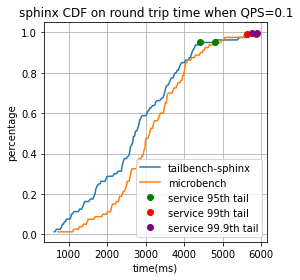

In [9]:
fig, ax0 = plt.subplots(1, 1, sharey=True, tight_layout=True, figsize=(4, 4))

tag="0.1"

sjrnTailData, svcTailData= getTailMultLatPct("/home/zohan/tailbench/results/sphinx-2/" + tag)
sjrnTailDatamean = stats.tmean(sjrnTailData)
sjrnTailData95th = stats.scoreatpercentile(sjrnTailData, 95)
sjrnTailData99th = stats.scoreatpercentile(sjrnTailData, 99)
sjrnTailData999th = stats.scoreatpercentile(sjrnTailData, 99.9)
sjrnTail95Mean = stats.tmean(sjrnTailData, (sjrnTailData95th, max(sjrnTailData)))
sjrnTail99Mean = stats.tmean(sjrnTailData, (sjrnTailData99th, max(sjrnTailData)))
svcTailDatamean = stats.tmean(svcTailData)
svcTailData95th = stats.scoreatpercentile(svcTailData, 95)
svcTailData99th = stats.scoreatpercentile(svcTailData, 99)
svcTailData999th = stats.scoreatpercentile(svcTailData, 99.9)
svcTail95Mean = stats.tmean(svcTailData, (svcTailData95th, max(svcTailData)))
svcTail99Mean = stats.tmean(svcTailData, (svcTailData99th, max(svcTailData)))

sjrnMicroData, svcMicroData= getuMultLatPct("/home/zohan/microbench/result-microsphinx-2-criticaltry/" + tag)
sjrnMicroDatamean = stats.tmean(sjrnMicroData)
sjrnMicroData95th = stats.scoreatpercentile(sjrnMicroData, 95)
sjrnMicroData99th = stats.scoreatpercentile(sjrnMicroData, 99)
sjrnMicroData999th = stats.scoreatpercentile(sjrnMicroData, 99.9)
sjrnMicro95Mean = stats.tmean(sjrnMicroData, (sjrnMicroData95th, max(sjrnMicroData)))
sjrnMicro99Mean = stats.tmean(sjrnMicroData, (sjrnMicroData99th, max(sjrnMicroData)))
svcMicroDatamean = stats.tmean(svcMicroData)
svcMicroData95th = stats.scoreatpercentile(svcMicroData, 95)
svcMicroData99th = stats.scoreatpercentile(svcMicroData, 99)
svcMicroData999th = stats.scoreatpercentile(svcMicroData, 99.9)
svcMicro95Mean = stats.tmean(svcMicroData, (svcMicroData95th, max(svcMicroData)))
svcMicro99Mean = stats.tmean(svcMicroData, (svcMicroData99th, max(svcMicroData)))

tailArrays,tailBase,_ = ax0.hist(sjrnTailData,bins=200,density=True,cumulative=1,histtype='step')
microArrays,microBase,_ = ax0.hist(sjrnMicroData,bins=200,density=True,cumulative=1,histtype='step')

ax0.cla()
ax0.plot(tailBase[0:200], tailArrays,label='tailbench-sphinx')
ax0.plot(sjrnTailData95th,0.95,'o',color="green")
ax0.plot(sjrnTailData99th,0.99,'o',color="red")
ax0.plot(sjrnTailData999th,0.999,'o',color="purple")
print(sjrnTailDatamean,sjrnTail95Mean,sjrnTail99Mean,sjrnTailData999th)
print(svcTailDatamean,svcTail95Mean,svcTail99Mean,svcTailData999th)

ax0.plot(microBase[0:200], microArrays,label='microbench')
ax0.plot(sjrnMicroData95th,0.95,'o',color="green",label="service 95th tail")
ax0.plot(sjrnMicroData99th,0.99,'o',color="red",label="service 99th tail")
ax0.plot(sjrnMicroData999th,0.999,'o',color="purple",label="service 99.9th tail")
print(sjrnMicroDatamean,sjrnMicro95Mean,sjrnMicro99Mean,sjrnMicroData999th)
print(svcMicroDatamean,svcMicro95Mean,svcMicro99Mean,svcMicroData999th)



# ax0.set_xlim(0, 8000)
ax0.set_title("sphinx CDF on round trip time when QPS=" + tag)
ax0.set_ylabel('percentage')
ax0.set_xlabel('time(ms)')
# plt.xticks(np.arange(2.6, 4.2, 0.2))
ax0.legend(loc='best')
ax0.grid(True)
plt.show()

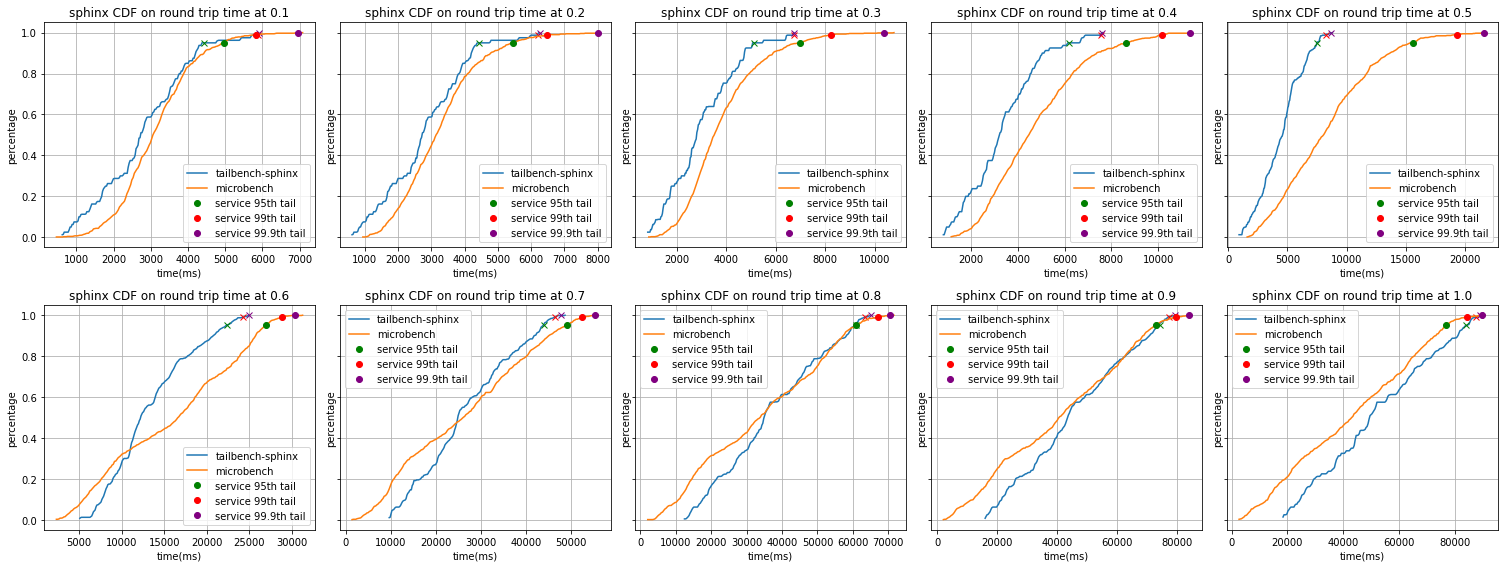

In [264]:
fig, ax = plt.subplots(2, 5, sharey=True, tight_layout=True, figsize=(21, 8))

for base in 0,1:
    for idx in range(0,5,1):
        # print(str(ax[base,idx]))
        # print(str((base*5+idx+1)/10))

        sjrnTailData, svcTailData= getTailMultLatPct("/home/zohan/tailbench/results/sphinx-2/"+str((base*5+idx+1)/10))
        sjrnTailDatamean = stats.tmean(sjrnTailData)
        sjrnTailData95th = stats.scoreatpercentile(sjrnTailData, 95)
        sjrnTailData99th = stats.scoreatpercentile(sjrnTailData, 99)
        sjrnTailData999th = stats.scoreatpercentile(sjrnTailData, 99.9)
        sjrnTail95Mean = stats.tmean(sjrnTailData, (sjrnTailData95th, max(sjrnTailData)))
        sjrnTail99Mean = stats.tmean(sjrnTailData, (sjrnTailData99th, max(sjrnTailData)))
        svcTailDatamean = stats.tmean(svcTailData)
        svcTailData95th = stats.scoreatpercentile(svcTailData, 95)
        svcTailData99th = stats.scoreatpercentile(svcTailData, 99)
        svcTailData999th = stats.scoreatpercentile(svcTailData, 99.9)
        svcTail95Mean = stats.tmean(svcTailData, (svcTailData95th, max(svcTailData)))
        svcTail99Mean = stats.tmean(svcTailData, (svcTailData99th, max(svcTailData)))

        sjrnMicroData, svcMicroData= getuMultLatPct("/home/zohan/microbench/result-microsphinx-2/"+str((base*5+idx+1)/10))
        sjrnMicroDatamean = stats.tmean(sjrnMicroData)
        sjrnMicroData95th = stats.scoreatpercentile(sjrnMicroData, 95)
        sjrnMicroData99th = stats.scoreatpercentile(sjrnMicroData, 99)
        sjrnMicroData999th = stats.scoreatpercentile(sjrnMicroData, 99.9)
        sjrnMicro95Mean = stats.tmean(sjrnMicroData, (sjrnMicroData95th, max(sjrnMicroData)))
        sjrnMicro99Mean = stats.tmean(sjrnMicroData, (sjrnMicroData99th, max(sjrnMicroData)))
        svcMicroDatamean = stats.tmean(svcMicroData)
        svcMicroData95th = stats.scoreatpercentile(svcMicroData, 95)
        svcMicroData99th = stats.scoreatpercentile(svcMicroData, 99)
        svcMicroData999th = stats.scoreatpercentile(svcMicroData, 99.9)
        svcMicro95Mean = stats.tmean(svcMicroData, (svcMicroData95th, max(svcMicroData)))
        svcMicro99Mean = stats.tmean(svcMicroData, (svcMicroData99th, max(svcMicroData)))

        tailArrays,tailBase,_ = ax[base,idx].hist(sjrnTailData,bins=200,density=True,cumulative=1,histtype='step')
        microArrays,microBase,_ = ax[base,idx].hist(sjrnMicroData,bins=200,density=True,cumulative=1,histtype='step')

        ax[base,idx].cla()
        ax[base,idx].plot(tailBase[0:200], tailArrays,label='tailbench-sphinx')
        ax[base,idx].plot(sjrnTailData95th,0.95,'x',color="green")
        ax[base,idx].plot(sjrnTailData99th,0.99,'x',color="red")
        ax[base,idx].plot(sjrnTailData999th,0.999,'x',color="purple")
        # print(sjrnTailDatamean,sjrnTail95Mean,sjrnTail99Mean,sjrnTailData999th)
        # print(svcTailDatamean,svcTail95Mean,svcTail99Mean,svcTailData999th)

        ax[base,idx].plot(microBase[0:200], microArrays,label='microbench')
        ax[base,idx].plot(sjrnMicroData95th,0.95,'o',color="green",label="service 95th tail")
        ax[base,idx].plot(sjrnMicroData99th,0.99,'o',color="red",label="service 99th tail")
        ax[base,idx].plot(sjrnMicroData999th,0.999,'o',color="purple",label="service 99.9th tail")
        # print(sjrnMicroDatamean,sjrnMicro95Mean,sjrnMicro99Mean,sjrnMicroData999th)
        # print(svcMicroDatamean,svcMicro95Mean,svcMicro99Mean,svcMicroData999th)



        # ax[base,idx].set_xlim(0, 8000)
        ax[base,idx].set_title("sphinx CDF on round trip time at "+str((base*5+idx+1)/10))
        ax[base,idx].set_ylabel('percentage')
        ax[base,idx].set_xlabel('time(ms)')
        # plt.xticks(np.arange(2.6, 4.2, 0.2))
        ax[base,idx].legend(loc='best')
        ax[base,idx].grid(True)

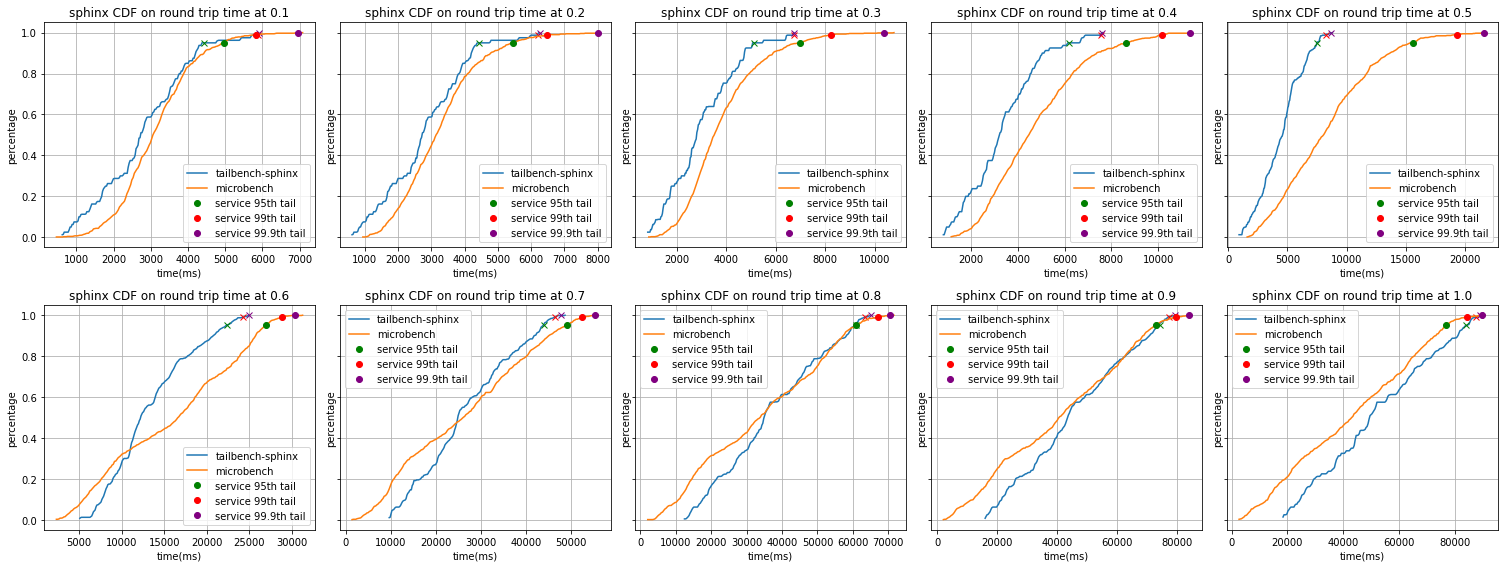

In [10]:
fig, ax = plt.subplots(2, 5, sharey=True, tight_layout=True, figsize=(21, 8))

for base in 0,1:
    for idx in range(0,5,1):
        # print(str(ax[base,idx]))
        # print(str((base*5+idx+1)/10))

        sjrnTailData, svcTailData= getTailMultLatPct("/home/zohan/tailbench/results/sphinx-2/"+str((base*5+idx+1)/10))
        sjrnTailDatamean = stats.tmean(sjrnTailData)
        sjrnTailData95th = stats.scoreatpercentile(sjrnTailData, 95)
        sjrnTailData99th = stats.scoreatpercentile(sjrnTailData, 99)
        sjrnTailData999th = stats.scoreatpercentile(sjrnTailData, 99.9)
        sjrnTail95Mean = stats.tmean(sjrnTailData, (sjrnTailData95th, max(sjrnTailData)))
        sjrnTail99Mean = stats.tmean(sjrnTailData, (sjrnTailData99th, max(sjrnTailData)))
        svcTailDatamean = stats.tmean(svcTailData)
        svcTailData95th = stats.scoreatpercentile(svcTailData, 95)
        svcTailData99th = stats.scoreatpercentile(svcTailData, 99)
        svcTailData999th = stats.scoreatpercentile(svcTailData, 99.9)
        svcTail95Mean = stats.tmean(svcTailData, (svcTailData95th, max(svcTailData)))
        svcTail99Mean = stats.tmean(svcTailData, (svcTailData99th, max(svcTailData)))

        sjrnMicroData, svcMicroData= getuMultLatPct("/home/zohan/microbench/result-microsphinx-2/"+str((base*5+idx+1)/10))
        sjrnMicroDatamean = stats.tmean(sjrnMicroData)
        sjrnMicroData95th = stats.scoreatpercentile(sjrnMicroData, 95)
        sjrnMicroData99th = stats.scoreatpercentile(sjrnMicroData, 99)
        sjrnMicroData999th = stats.scoreatpercentile(sjrnMicroData, 99.9)
        sjrnMicro95Mean = stats.tmean(sjrnMicroData, (sjrnMicroData95th, max(sjrnMicroData)))
        sjrnMicro99Mean = stats.tmean(sjrnMicroData, (sjrnMicroData99th, max(sjrnMicroData)))
        svcMicroDatamean = stats.tmean(svcMicroData)
        svcMicroData95th = stats.scoreatpercentile(svcMicroData, 95)
        svcMicroData99th = stats.scoreatpercentile(svcMicroData, 99)
        svcMicroData999th = stats.scoreatpercentile(svcMicroData, 99.9)
        svcMicro95Mean = stats.tmean(svcMicroData, (svcMicroData95th, max(svcMicroData)))
        svcMicro99Mean = stats.tmean(svcMicroData, (svcMicroData99th, max(svcMicroData)))

        tailArrays,tailBase,_ = ax[base,idx].hist(sjrnTailData,bins=200,density=True,cumulative=1,histtype='step')
        microArrays,microBase,_ = ax[base,idx].hist(sjrnMicroData,bins=200,density=True,cumulative=1,histtype='step')

        ax[base,idx].cla()
        ax[base,idx].plot(tailBase[0:200], tailArrays,label='tailbench-sphinx')
        ax[base,idx].plot(sjrnTailData95th,0.95,'x',color="green")
        ax[base,idx].plot(sjrnTailData99th,0.99,'x',color="red")
        ax[base,idx].plot(sjrnTailData999th,0.999,'x',color="purple")
        # print(sjrnTailDatamean,sjrnTail95Mean,sjrnTail99Mean,sjrnTailData999th)
        # print(svcTailDatamean,svcTail95Mean,svcTail99Mean,svcTailData999th)

        ax[base,idx].plot(microBase[0:200], microArrays,label='microbench')
        ax[base,idx].plot(sjrnMicroData95th,0.95,'o',color="green",label="service 95th tail")
        ax[base,idx].plot(sjrnMicroData99th,0.99,'o',color="red",label="service 99th tail")
        ax[base,idx].plot(sjrnMicroData999th,0.999,'o',color="purple",label="service 99.9th tail")
        # print(sjrnMicroDatamean,sjrnMicro95Mean,sjrnMicro99Mean,sjrnMicroData999th)
        # print(svcMicroDatamean,svcMicro95Mean,svcMicro99Mean,svcMicroData999th)



        # ax[base,idx].set_xlim(0, 8000)
        ax[base,idx].set_title("sphinx CDF on round trip time at "+str((base*5+idx+1)/10))
        ax[base,idx].set_ylabel('percentage')
        ax[base,idx].set_xlabel('time(ms)')
        # plt.xticks(np.arange(2.6, 4.2, 0.2))
        ax[base,idx].legend(loc='best')
        ax[base,idx].grid(True)

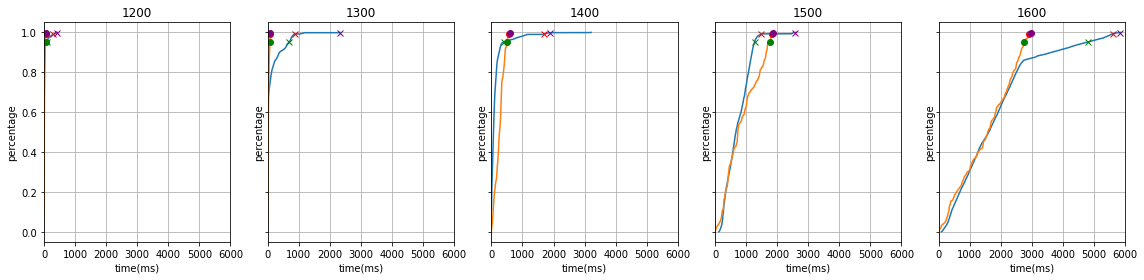

In [285]:
#"400","600","800","1200","1200","1400","1600"
fig, ax = plt.subplots(2, 4, sharey=True, tight_layout=True, figsize=(17, 8))

for base in 0,1:
    for idx in range(0,4,1):
        # print(str(ax[base,idx]))
        # print(str(400+base*1200+idx*200))

        sjrnTailData, svcTailData= getTailMultLatPct("/home/zohan/tailbench/results/masstree-2/"+str(400+base*800+idx*200))
        sjrnTailDatamean = stats.tmean(sjrnTailData)
        sjrnTailData95th = stats.scoreatpercentile(sjrnTailData, 95)
        sjrnTailData99th = stats.scoreatpercentile(sjrnTailData, 99)
        sjrnTailData999th = stats.scoreatpercentile(sjrnTailData, 99.9)
        sjrnTail95Mean = stats.tmean(sjrnTailData, (sjrnTailData95th, max(sjrnTailData)))
        sjrnTail99Mean = stats.tmean(sjrnTailData, (sjrnTailData99th, max(sjrnTailData)))
        svcTailDatamean = stats.tmean(svcTailData)
        svcTailData95th = stats.scoreatpercentile(svcTailData, 95)
        svcTailData99th = stats.scoreatpercentile(svcTailData, 99)
        svcTailData999th = stats.scoreatpercentile(svcTailData, 99.9)
        svcTail95Mean = stats.tmean(svcTailData, (svcTailData95th, max(svcTailData)))
        svcTail99Mean = stats.tmean(svcTailData, (svcTailData99th, max(svcTailData)))

        sjrnMicroData, svcMicroData= getuMultLatPct("/home/zohan/microbench/result-micromasstree-2-test/"+str(400+base*800+idx*200))
        sjrnMicroDatamean = stats.tmean(sjrnMicroData)
        sjrnMicroData95th = stats.scoreatpercentile(sjrnMicroData, 95)
        sjrnMicroData99th = stats.scoreatpercentile(sjrnMicroData, 99)
        sjrnMicroData999th = stats.scoreatpercentile(sjrnMicroData, 99.9)
        sjrnMicro95Mean = stats.tmean(sjrnMicroData, (sjrnMicroData95th, max(sjrnMicroData)))
        sjrnMicro99Mean = stats.tmean(sjrnMicroData, (sjrnMicroData99th, max(sjrnMicroData)))
        svcMicroDatamean = stats.tmean(svcMicroData)
        svcMicroData95th = stats.scoreatpercentile(svcMicroData, 95)
        svcMicroData99th = stats.scoreatpercentile(svcMicroData, 99)
        svcMicroData999th = stats.scoreatpercentile(svcMicroData, 99.9)
        svcMicro95Mean = stats.tmean(svcMicroData, (svcMicroData95th, max(svcMicroData)))
        svcMicro99Mean = stats.tmean(svcMicroData, (svcMicroData99th, max(svcMicroData)))

        tailArrays,tailBase,_ = ax[base,idx].hist(sjrnTailData,bins=200,density=True,cumulative=1,histtype='step')
        microArrays,microBase,_ = ax[base,idx].hist(sjrnMicroData,bins=200,density=True,cumulative=1,histtype='step')

        ax[base,idx].cla()
        ax[base,idx].plot(tailBase[0:200], tailArrays,label='tailbench-masstree')
        ax[base,idx].plot(sjrnTailData95th,0.95,'x',color="green")
        ax[base,idx].plot(sjrnTailData99th,0.99,'x',color="red")
        ax[base,idx].plot(sjrnTailData999th,0.999,'x',color="purple")
        # print(sjrnTailDatamean,sjrnTail95Mean,sjrnTail99Mean,sjrnTailData999th)
        # print(svcTailDatamean,svcTail95Mean,svcTail99Mean,svcTailData999th)

        ax[base,idx].plot(microBase[0:200], microArrays,label='microbench')
        ax[base,idx].plot(sjrnMicroData95th,0.95,'o',color="green",label="service 95th tail")
        ax[base,idx].plot(sjrnMicroData99th,0.99,'o',color="red",label="service 99th tail")
        ax[base,idx].plot(sjrnMicroData999th,0.999,'o',color="purple",label="service 99.9th tail")
        # print(sjrnMicroDatamean,sjrnMicro95Mean,sjrnMicro99Mean,sjrnMicroData999th)
        # print(svcMicroDatamean,svcMicro95Mean,svcMicro99Mean,svcMicroData999th)



        # ax[base,idx].set_xlim(0, 8000)
        ax[base,idx].set_title("masstree CDF on round trip time at "+str(400+base*800+idx*200))
        ax[base,idx].set_ylabel('percentage')
        ax[base,idx].set_xlabel('time(ms)')
        # plt.xticks(np.arange(2.6, 4.2, 0.2))
        ax[base,idx].legend(loc='best')
        ax[base,idx].grid(True)

0.655 0.700 0.913 0.890 1.348
0.652 0.680 1.057 0.863 1.409
0.681 1.061 1.233 1.196 1.584
0.659 0.687 1.100 0.979 1.469
0.651 0.678 1.075 0.880 1.498


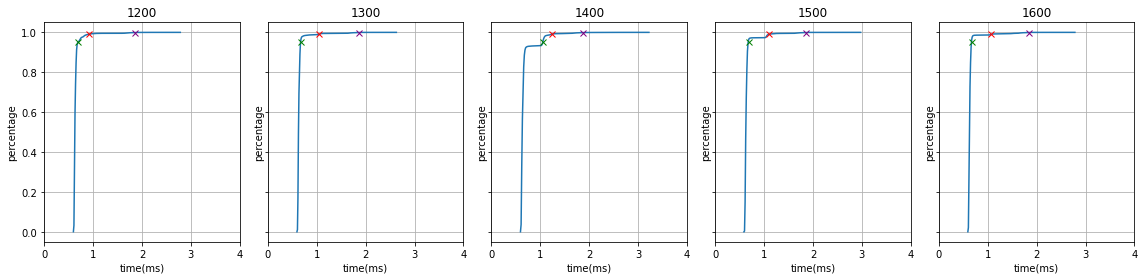

In [308]:
#"400","600","800","1200","1200","1400","1600"
# "1200","1300","1400","1500","1600")
fig, ax = plt.subplots(1, 5, sharey=True, tight_layout=True, figsize=(16, 4))

# for base in 0,1:
for idx in range(0,5,1):
    # print(str(ax[idx]))
    # print(str(400+base*1200+idx*200))

    sjrnTailData, svcTailData= getTailMultLatPct("/home/zohan/tailbench/results/masstree-2-checking/"+str(1200+idx*100))

    sjrnTailDatamean = stats.tmean(sjrnTailData)
    sjrnTailData95th = stats.scoreatpercentile(sjrnTailData, 95)
    sjrnTailData99th = stats.scoreatpercentile(sjrnTailData, 99)
    sjrnTailData999th = stats.scoreatpercentile(sjrnTailData, 99.9)
    sjrnTail95Mean = stats.tmean(sjrnTailData, (sjrnTailData95th, max(sjrnTailData)))
    sjrnTail99Mean = stats.tmean(sjrnTailData, (sjrnTailData99th, max(sjrnTailData)))

    svcTailDatamean = stats.tmean(svcTailData)
    svcTailData95th = stats.scoreatpercentile(svcTailData, 95)
    svcTailData99th = stats.scoreatpercentile(svcTailData, 99)
    svcTailData999th = stats.scoreatpercentile(svcTailData, 99.9)
    svcTail95Mean = stats.tmean(svcTailData, (svcTailData95th, max(svcTailData)))
    svcTail99Mean = stats.tmean(svcTailData, (svcTailData99th, max(svcTailData)))

    tailArrays,tailBase,_ = ax[idx].hist(svcTailData,bins=200,density=True,cumulative=1,histtype='step')

    ax[idx].cla()
    ax[idx].plot(tailBase[0:200], tailArrays,label='tailbench-masstree')
    ax[idx].plot(svcTailData95th,0.95,'x',color="green")
    ax[idx].plot(svcTailData99th,0.99,'x',color="red")
    ax[idx].plot(svcTailData999th,0.999,'x',color="purple")
    # print(sjrnTailDatamean,sjrnTail95Mean,sjrnTail99Mean,sjrnTailData999th)
    # print(svcTailDatamean,svcTail95Mean,svcTail99Mean,svcTailData999th)


    ax[idx].set_xlim(0, 4.0)
    ax[idx].set_title(str(1200+idx*100))
    ax[idx].set_ylabel('percentage')
    ax[idx].set_xlabel('time(ms)')
    # plt.xticks(np.arange(2.6, 4.2, 0.2))
    # ax[idx].legend(loc='best')
    ax[idx].grid(True)
    # print(str(1200+idx*100),svcTailDatamean,svcTailData95th,svcTailData99th,svcTail95Mean,svcTail99Mean)
    print("%.3f %.3f %.3f %.3f %.3f" % (svcTailDatamean,svcTailData95th,svcTailData99th,svcTail95Mean,svcTail99Mean))

In [ ]:
1200 0.6550350467968751 0.725876 0.9195776600000014
1300 0.6688305682692308 0.7338578999999997 1.484492290000001
1400 0.6511634312276784 0.6776368999999998 0.7612297700000025
1500 0.6460662743833332 0.675577 0.6983361800000001
1600 0.66753599471875 0.7121708999999998 1.2118457500000008